In [217]:
# Import necessary libraries
import pandas as pd

# Load the dataset (ensure the correct file path)
file_path = "raw_ds.xlsx"  # Update this with the actual file location
raw_data = pd.read_excel(file_path, sheet_name="Sheet1")

# View the first few rows
print(raw_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr #            105 non-null    int64  
 1   Age             105 non-null    int64  
 2   Position        105 non-null    int64  
 3   Qual            105 non-null    int64  
 4   Specialisation  105 non-null    int64  
 5   Exp             105 non-null    int64  
 6   A1              105 non-null    int64  
 7   A2              105 non-null    int64  
 8   A3              105 non-null    int64  
 9   A4              105 non-null    int64  
 10  A5              105 non-null    int64  
 11  A6              105 non-null    int64  
 12  A7              105 non-null    int64  
 13  B1              105 non-null    int64  
 14  B2              105 non-null    int64  
 15  B3              105 non-null    int64  
 16  B4              105 non-null    int64  
 17  B5              105 non-null    int

In [221]:
# Import necessary libraries
import pandas as pd

# Load raw survey data


# Load survey questions file
survey_questions = pd.read_excel("survey_questions.xlsx")
categories = pd.read_excel("categorical_data.xlsx")

# Display the first few rows of both datasets
print(raw_data.head())
print(survey_questions.head())
print(categories.head())

   Sr #  Age  Position  Qual  Specialisation  Exp  A1  A2  A3  A4  ...  \
0     1    2         2     2               3    2   4   4   3   4  ...   
1     2    3         4     3               1    3   2   1   3   4  ...   
2     3    1         3     2               4    1   1   3   2   3  ...   
3     4    4         3     3               2    3   3   3   2   3  ...   
4     5    2         2     2               2    1   4   4   5   5  ...   

   Total_D  Total_E  Total_F  Total_G  Total CGI      %age       ROA  \
0       16       34        8       15        191  0.795833  0.180568   
1       16       31        7       13        157  0.654167  0.058317   
2       13       26        8       16        144  0.600000  0.017459   
3       13       26        7       17        148  0.616667  0.012970   
4       17       34        6       13        201  0.837500 -0.000110   

        RoE     ROA.1     RoE.1  
0  0.204166  0.180568  0.204166  
1  0.097522  0.062861  0.151215  
2  0.056479  0.01737

In [223]:
# Import necessary libraries
import pandas as pd

# Check for missing values
print(raw_data.isnull().sum())

# Handling missing values:
# - Numeric columns: Fill missing values with median
# - Categorical columns: Replace missing entries with "Unknown"
numeric_cols = raw_data.select_dtypes(include=["number"]).columns
categorical_cols = raw_data.select_dtypes(include=["object"]).columns

raw_data[numeric_cols] = raw_data[numeric_cols].fillna(raw_data[numeric_cols].median())
raw_data[categorical_cols] = raw_data[categorical_cols].fillna("Unknown")

print("Data cleaning completed: Missing values handled.")

Sr #              0
Age               0
Position          0
Qual              0
Specialisation    0
                 ..
%age              0
ROA               0
RoE               0
ROA.1             0
RoE.1             0
Length: 96, dtype: int64
Data cleaning completed: Missing values handled.


### Merget category value with main dataset

In [225]:
# Merge datasets using category_code as the key
# Filter only rows where Category = 'Age_Group'
age_group_df = categories[categories["Category"] == "Age_Group"]

print(age_group_df)
merged_df = raw_data.merge(age_group_df, left_on="Age", right_on="Code", how="left")

# Display updated dataset with Age Group column
print(merged_df[["Age", "Code", "Description"]].head())

# Rename specific columns
merged_df = merged_df.rename(columns={
    "Description": "Age_Group"
   
})
# Filter by specific categories
position_df = categories[categories["Category"] == "Position"]
qualification_df = categories[categories["Category"] == "Qualifications"]
specialization_df = categories[categories["Category"] == "Specialization"]
experience_df = categories[categories["Category"] == "Experience"]

# Merge Position
merged_df = merged_df.merge(position_df, left_on="Position", right_on="Code", how="left", suffixes=("", "_Position"))

# Merge Qualifications
merged_df = merged_df.merge(qualification_df, left_on="Qual", right_on="Code", how="left", suffixes=("", "_Qualifications"))

# Merge Specialization
merged_df = merged_df.merge(specialization_df, left_on="Specialisation", right_on="Code", how="left", suffixes=("", "_Specialization"))

# Merge Experience
merged_df = merged_df.merge(experience_df, left_on="Exp", right_on="Code", how="left", suffixes=("", "_Experience"))

# Display updated dataset with merged categorical fields
print(merged_df.head())


    Category  Code       Description
0  Age_Group     1  30 years or less
1  Age_Group     2    31 to 40 years
2  Age_Group     3    41 to 50 years
3  Age_Group     4    51 to 60 years
4  Age_Group     5    Above 60 years
   Age  Code       Description
0    2     2    31 to 40 years
1    3     3    41 to 50 years
2    1     1  30 years or less
3    4     4    51 to 60 years
4    2     2    31 to 40 years
   Sr #  Age  Position  Qual  Specialisation  Exp  A1  A2  A3  A4  ...  \
0     1    2         2     2               3    2   4   4   3   4  ...   
1     2    3         4     3               1    3   2   1   3   4  ...   
2     3    1         3     2               4    1   1   3   2   3  ...   
3     4    4         3     3               2    3   3   3   2   3  ...   
4     5    2         2     2               2    1   4   4   5   5  ...   

   Description  Category_Qualifications  Code_Qualifications  \
0      Manager           Qualifications                    2   
1      Auditor     

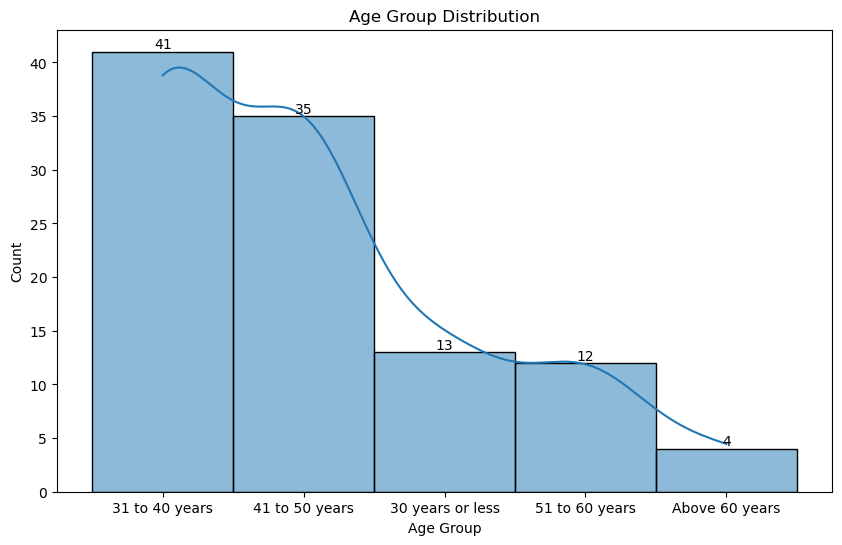

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(merged_df["Age_Group"], bins=30, kde=True)

# Add title and labels
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Annotate bars with labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black')

# Show plot
plt.show()

In [229]:
import pandas as pd

# Load categorical data
categories = pd.read_excel("categorical_data.xlsx", sheet_name="Sheet1")

# Check if "Category" column exists
print("Columns in categories:", categories.columns)

# Ensure it's correctly formatted before filtering
print("Unique categories:", categories["Category"].unique())

Columns in categories: Index(['Category', 'Code', 'Description'], dtype='object')
Unique categories: ['Age_Group' 'Position' 'Qualifications' 'Specialization' 'Experience']


In [231]:
print("Columns in merged_df:", merged_df.columns)
print("Columns in categories:", categories.columns)

Columns in merged_df: Index(['Sr #', 'Age', 'Position', 'Qual', 'Specialisation', 'Exp', 'A1', 'A2',
       'A3', 'A4',
       ...
       'Description', 'Category_Qualifications', 'Code_Qualifications',
       'Description_Qualifications', 'Category_Specialization',
       'Code_Specialization', 'Description_Specialization',
       'Category_Experience', 'Code_Experience', 'Description_Experience'],
      dtype='object', length=111)
Columns in categories: Index(['Category', 'Code', 'Description'], dtype='object')


In [233]:
### merge categorical variables 

import pandas as pd

# Load categorical dataset
categories = pd.read_excel("categorical_data.xlsx")

# Load raw dataset
raw_data = pd.read_excel("raw_ds.xlsx")  # Ensure correct filename

# Step 1: Filter categories
Age_df=categories[categories["Category"] == "Age_Group"]
position_df = categories[categories["Category"] == "Position"]
qualification_df = categories[categories["Category"] == "Qualifications"]
specialization_df = categories[categories["Category"] == "Specialization"]
experience_df = categories[categories["Category"] == "Experience"]

# Step 2: Merge categorical descriptions into the raw dataset
merged_df = raw_data.merge(Age_df, left_on="Age", right_on="Code", how="left", suffixes=("", "_Age"))
merged_df = raw_data.merge(position_df, left_on="Position", right_on="Code", how="left", suffixes=("", "_Position"))
merged_df = merged_df.merge(qualification_df, left_on="Qual", right_on="Code", how="left", suffixes=("", "_Qualifications"))
merged_df = merged_df.merge(specialization_df, left_on="Specialisation", right_on="Code", how="left", suffixes=("", "_Specialization"))
merged_df = merged_df.merge(experience_df, left_on="Exp", right_on="Code", how="left", suffixes=("", "_Experience"))

# Step 3: Drop unnecessary columns (keeping descriptions)
#merged_df.drop(columns=["Code_Position", "Code_Qualifications", "Code_Specialization", "Code_Experience"], inplace=True)

# Verify merge success
print(merged_df.head())

   Sr #  Age  Position  Qual  Specialisation  Exp  A1  A2  A3  A4  ...  \
0     1    2         2     2               3    2   4   4   3   4  ...   
1     2    3         4     3               1    3   2   1   3   4  ...   
2     3    1         3     2               4    1   1   3   2   3  ...   
3     4    4         3     3               2    3   3   3   2   3  ...   
4     5    2         2     2               2    1   4   4   5   5  ...   

   Description  Category_Qualifications  Code_Qualifications  \
0      Manager           Qualifications                    2   
1      Auditor           Qualifications                    3   
2   Accountant           Qualifications                    2   
3   Accountant           Qualifications                    3   
4      Manager           Qualifications                    2   

   Description_Qualifications  Category_Specialization  Code_Specialization  \
0       Masters or equivalent           Specialization                    3   
1     Bachel

In [235]:
print(merged_df.info())  # Check for missing values
print(merged_df.head())  # Preview dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Columns: 108 entries, Sr # to Description_Experience
dtypes: float64(5), int64(95), object(8)
memory usage: 89.4+ KB
None
   Sr #  Age  Position  Qual  Specialisation  Exp  A1  A2  A3  A4  ...  \
0     1    2         2     2               3    2   4   4   3   4  ...   
1     2    3         4     3               1    3   2   1   3   4  ...   
2     3    1         3     2               4    1   1   3   2   3  ...   
3     4    4         3     3               2    3   3   3   2   3  ...   
4     5    2         2     2               2    1   4   4   5   5  ...   

   Description  Category_Qualifications  Code_Qualifications  \
0      Manager           Qualifications                    2   
1      Auditor           Qualifications                    3   
2   Accountant           Qualifications                    2   
3   Accountant           Qualifications                    3   
4      Manager           Qualifications  

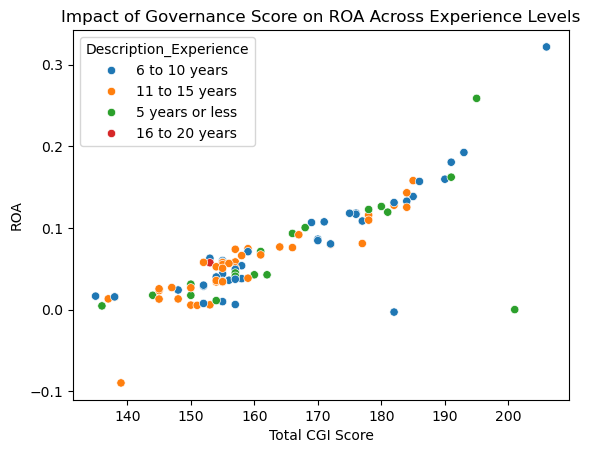

In [15]:
sns.scatterplot(x=merged_df["Total CGI"], y=merged_df["ROA"], hue=merged_df["Description_Experience"])
plt.title("Impact of Governance Score on ROA Across Experience Levels")
plt.xlabel("Total CGI Score")
plt.ylabel("ROA")
plt.show()

In [237]:
print("Columns in merged_df:", merged_df.columns)  # Check if merged_df exists

Columns in merged_df: Index(['Sr #', 'Age', 'Position', 'Qual', 'Specialisation', 'Exp', 'A1', 'A2',
       'A3', 'A4',
       ...
       'Description', 'Category_Qualifications', 'Code_Qualifications',
       'Description_Qualifications', 'Category_Specialization',
       'Code_Specialization', 'Description_Specialization',
       'Category_Experience', 'Code_Experience', 'Description_Experience'],
      dtype='object', length=108)


Index(['Sr #', 'Age', 'Position', 'Qual', 'Specialisation', 'Exp', 'A1', 'A2',
       'A3', 'A4',
       ...
       'Description', 'Category_Qualifications', 'Code_Qualifications',
       'Description_Qualifications', 'Category_Specialization',
       'Code_Specialization', 'Description_Specialization',
       'Category_Experience', 'Code_Experience', 'Description_Experience'],
      dtype='object', length=108)


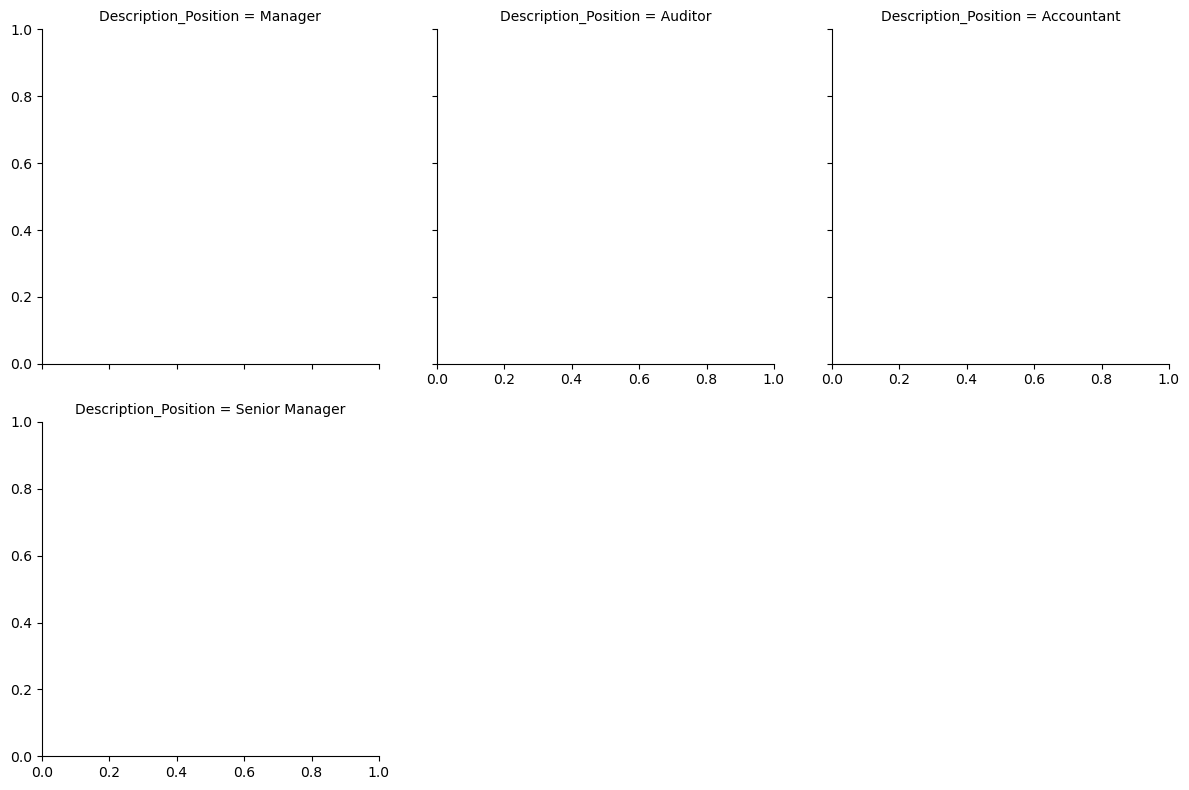

In [239]:
print(merged_df.columns)  # Show all available columns
merged_df = raw_data.merge(position_df, left_on="Position", right_on="Code", how="left", suffixes=("", "_Position"))
merged_df.rename(columns={"Description": "Description_Position"}, inplace=True)
g = sns.FacetGrid(merged_df, col="Description_Position", col_wrap=3, height=4)  # Use actual column name

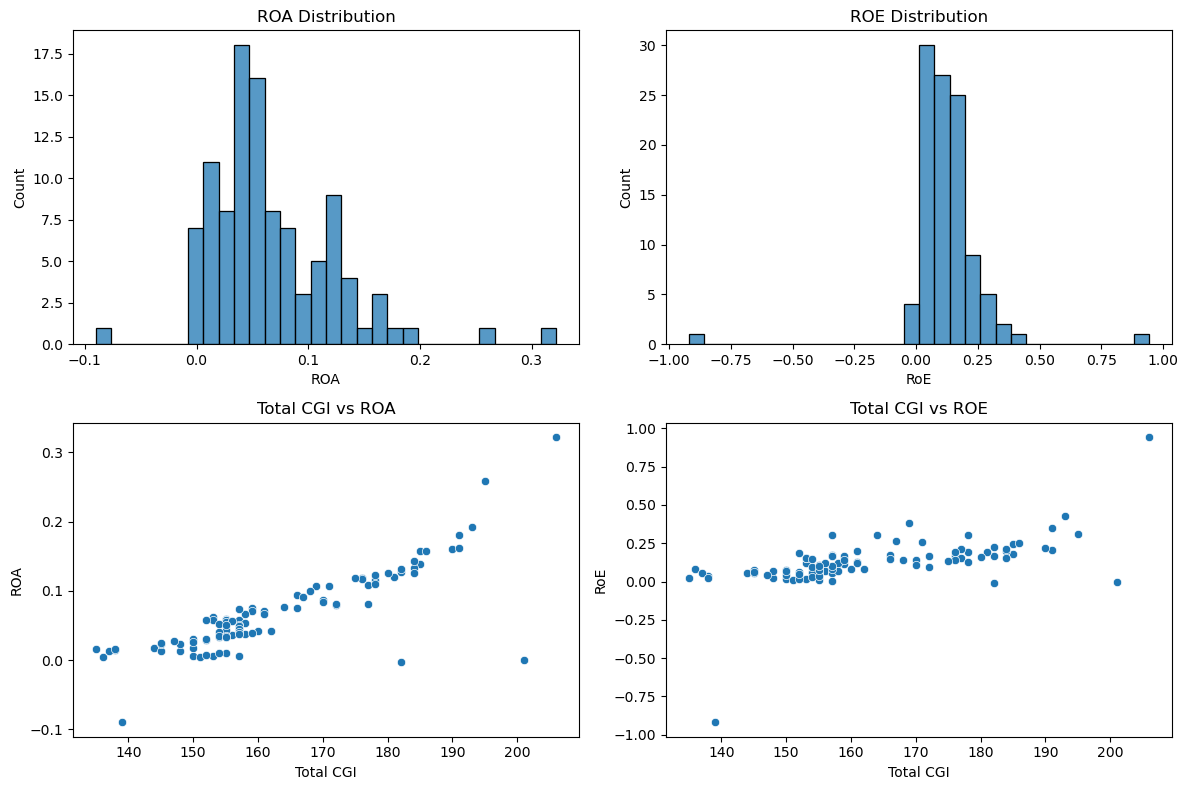

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Creates 2 rows × 2 columns grid

# Plot 1 - Histogram for ROA
sns.histplot(merged_df["ROA"], bins=30, ax=axes[0, 0])
axes[0, 0].set_title("ROA Distribution")

# Plot 2 - Histogram for ROE
sns.histplot(merged_df["RoE"], bins=30, ax=axes[0, 1])
axes[0, 1].set_title("ROE Distribution")

# Plot 3 - Scatter plot CGI Score vs ROA
sns.scatterplot(x=merged_df["Total CGI"], y=merged_df["ROA"], ax=axes[1, 0])
axes[1, 0].set_title("Total CGI vs ROA")

# Plot 4 - Scatter plot CGI Score vs ROE
sns.scatterplot(x=merged_df["Total CGI"], y=merged_df["RoE"], ax=axes[1, 1])
axes[1, 1].set_title("Total CGI vs ROE")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [267]:
### merge categorical variables 

import pandas as pd

# Load categorical dataset
categories = pd.read_excel("categorical_data.xlsx")

# Load raw dataset
raw_data = pd.read_excel("raw_ds.xlsx")  # Ensure correct filename

# Step 1: Filter categories
Age_df = categories[categories["Category"] == "Age_Group"]
position_df = categories[categories["Category"] == "Position"]
qualification_df = categories[categories["Category"] == "Qualifications"]
specialization_df = categories[categories["Category"] == "Specialization"]
experience_df = categories[categories["Category"] == "Experience"]

# Step 2: Merge categorical descriptions into the raw dataset
merged_df = raw_data.merge(Age_df, left_on="Age", right_on="Code", how="left", suffixes=("", "_Age"))
merged_df = raw_data.merge(position_df, left_on="Position", right_on="Code", how="left", suffixes=("", "_Position"))
merged_df = merged_df.merge(qualification_df, left_on="Qual", right_on="Code", how="left", suffixes=("", "_Qualifications"))
merged_df = merged_df.merge(specialization_df, left_on="Specialisation", right_on="Code", how="left", suffixes=("", "_Specialization"))
merged_df = merged_df.merge(experience_df, left_on="Exp", right_on="Code", how="left", suffixes=("", "_Experience"))

# Step 3: Drop unnecessary columns (keeping descriptions)
# merged_df.drop(columns=["Code_Position", "Code_Qualifications", "Code_Specialization", "Code_Experience"], inplace=True)

# Verify merge success
print(merged_df.head())

   Sr #  Age  Position  Qual  Specialisation  Exp  A1  A2  A3  A4  ...  \
0     1    2         2     2               3    2   4   4   3   4  ...   
1     2    3         4     3               1    3   2   1   3   4  ...   
2     3    1         3     2               4    1   1   3   2   3  ...   
3     4    4         3     3               2    3   3   3   2   3  ...   
4     5    2         2     2               2    1   4   4   5   5  ...   

   Description  Category_Qualifications  Code_Qualifications  \
0      Manager           Qualifications                    2   
1      Auditor           Qualifications                    3   
2   Accountant           Qualifications                    2   
3   Accountant           Qualifications                    3   
4      Manager           Qualifications                    2   

   Description_Qualifications  Category_Specialization  Code_Specialization  \
0       Masters or equivalent           Specialization                    3   
1     Bachel

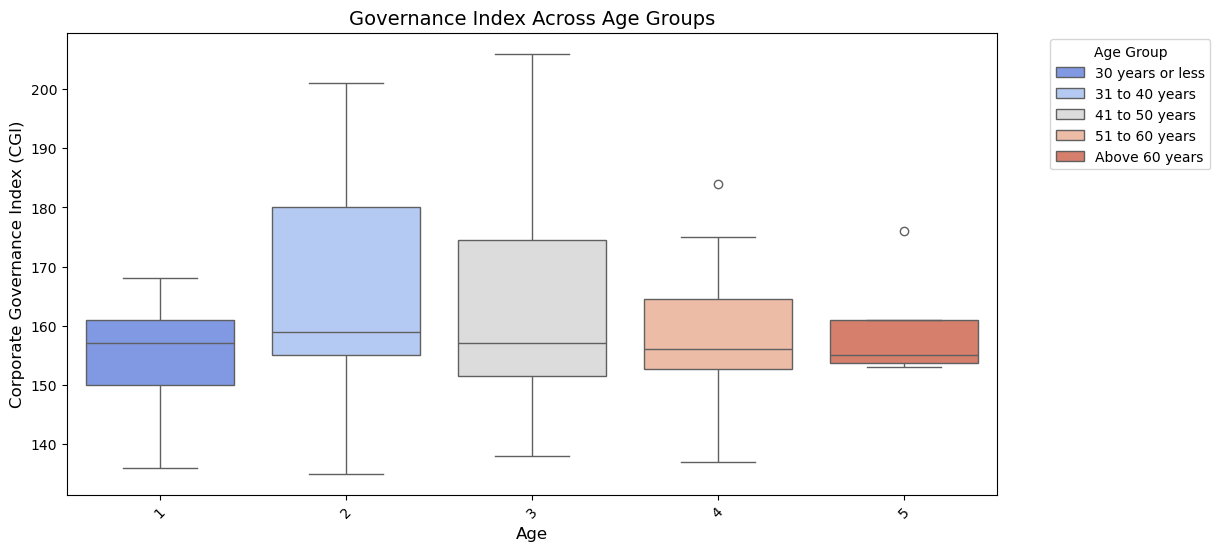

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
age_group_df = categories[categories["Category"] == "Age_Group"]
merged_df = merged_df.merge(age_group_df, left_on="Age", right_on="Code", how="left")
merged_df.rename(columns={"Description": "Description_Age"}, inplace=True)

# Verify if 'Description_Age' exists
if "Description_Age" in merged_df.columns:
    sns.boxplot(x="Age", y="Total CGI", data=merged_df, hue="Description_Age", palette="coolwarm")
else:
    print("Column 'Description_Age' not found! Ensure it's correctly merged.")

plt.title("Governance Index Across Age Groups", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Corporate Governance Index (CGI)", fontsize=12)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.savefig("CGI_AGE.png")
plt.show()

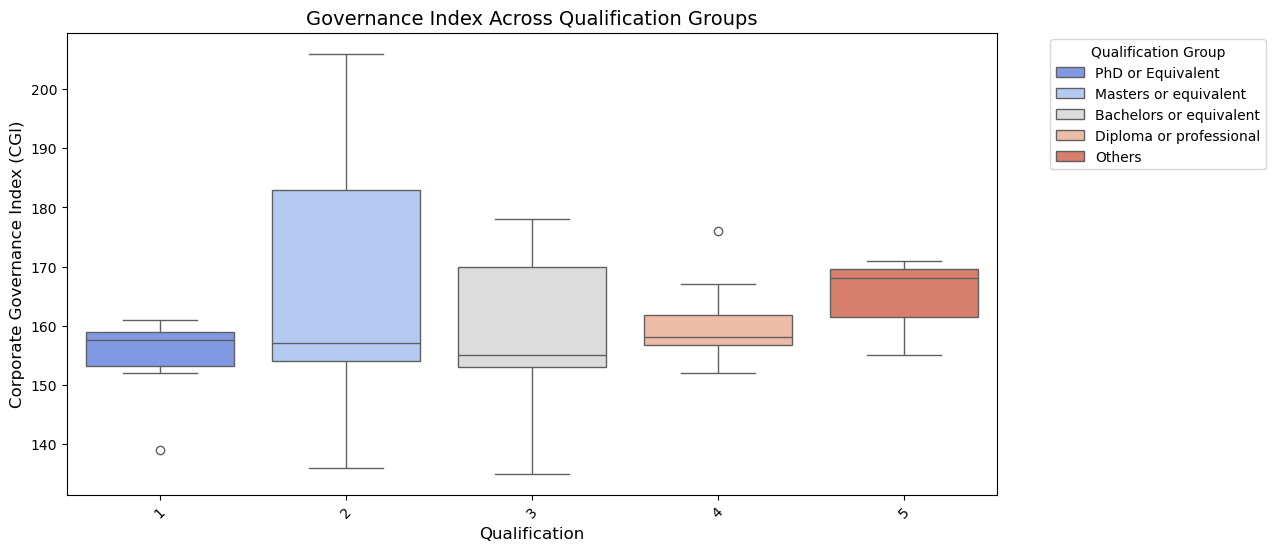

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
Qualification_group_df = categories[categories["Category"] == "Qualificaiton"]
merged_df = merged_df.merge(age_group_df, left_on="Qual", right_on="Code", how="left")
merged_df.rename(columns={"Description": "Description_Qualification"}, inplace=True)

# Verify if 'Description_Age' exists
if "Description_Qualification" in merged_df.columns:
    sns.boxplot(x="Qual", y="Total CGI", data=merged_df, hue="Description_Qualifications", palette="coolwarm")
else:
    print("Column 'Description_Qualification' not found! Ensure it's correctly merged.")

plt.title("Governance Index Across Qualification Groups", fontsize=14)
plt.xlabel("Qualification", fontsize=12)
plt.ylabel("Corporate Governance Index (CGI)", fontsize=12)
plt.legend(title="Qualification Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.savefig("CGI_Qualification.png")
plt.show()

In [263]:
print(merged_df.columns)

Index(['Sr #', 'Age', 'Position', 'Qual', 'Specialisation', 'Exp', 'A1', 'A2',
       'A3', 'A4',
       ...
       'Description_Experience', 'Category_y', 'Code_y',
       'Description_Qualification', 'Category_x', 'Code_x', 'Description_Age',
       'Category_y', 'Code_y', 'Description_Qualification'],
      dtype='object', length=108)


Available Columns in merged_df: Index(['Sr #', 'Age', 'Position', 'Qual', 'Specialisation', 'Exp', 'A1', 'A2',
       'A3', 'A4', 'A5', 'A6', 'A7', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'D1', 'D2', 'D3', 'D4', 'E1', 'E2',
       'E3', 'E4', 'E5', 'E6', 'E7', 'F1', 'F2', 'G1', 'G2', 'G3', 'G4', 'BA1',
       'BA2', 'BA3', 'BA4', 'BA5', 'BA6', 'BA7', 'BA8', 'BA9', 'BA10', 'BA11',
       'BA12', 'BA13', 'BA14', 'BA15', 'BA16', 'BA17', 'DR1', 'DR2', 'DR3',
       'DR4', 'DR5', 'DR6', 'DR7', 'DR8', 'DR9', 'DR10', 'DR11', 'DR12',
       'Total_A', 'Total_B', 'Total_C', 'Total_D', 'Total_E', 'Total_F',
       'Total_G', 'Total CGI', '%age', 'ROA', 'RoE', 'ROA.1', 'RoE.1',
       'Category', 'Code', 'Description_Experience'],
      dtype='object')


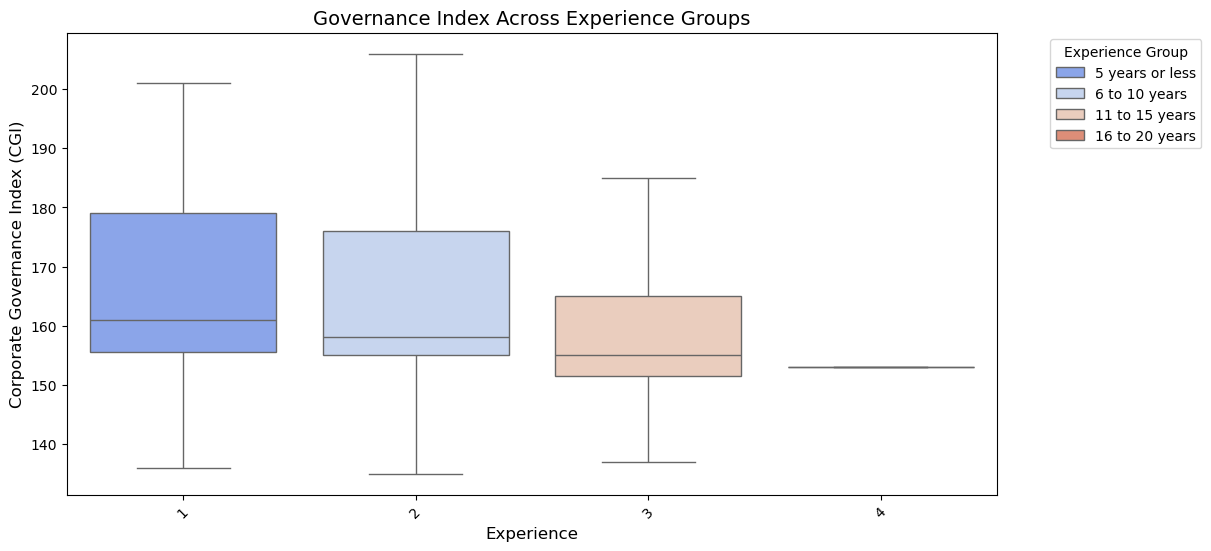

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 🚀 Step 1: Load Data
categories = pd.read_excel("categorical_data.xlsx")
raw_data = pd.read_excel("raw_ds.xlsx")

### 🚀 Step 2: Merge Categorical Description for Experience
experience_group_df = categories[categories["Category"] == "Experience"]
merged_df = raw_data.merge(experience_group_df, left_on="Exp", right_on="Code", how="left")
merged_df.rename(columns={"Description": "Description_Experience"}, inplace=True)

# Verify merge success
print("Available Columns in merged_df:", merged_df.columns)

### 🚀 Step 3: Create a Box Plot - Governance Index Across Experience Groups
plt.figure(figsize=(12, 6))

# Check if 'Description_Experience' exists before plotting
if "Description_Experience" in merged_df.columns:
    sns.boxplot(x="Exp", y="Total CGI", data=merged_df, hue="Description_Experience", palette="coolwarm")
else:
    print("Column 'Description_Experience' not found! Ensure it's correctly merged.")

plt.title("Governance Index Across Experience Groups", fontsize=14)
plt.xlabel("Experience", fontsize=12)
plt.ylabel("Corporate Governance Index (CGI)", fontsize=12)
plt.legend(title="Experience Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.savefig("CGI_Experience.png")
plt.show()

In [279]:
from scipy.stats import bartlett
import pandas as pd

# Load dataset
df = pd.read_excel("raw_ds.xlsx")

# Select survey-related numeric columns (adjust based on your dataset)
survey_cols = ["A1", "A2", "B1", "B2", "C1", "E1", "F1", "G1"]
df_survey = df[survey_cols].dropna()

# Perform Bartlett’s test manually
test_statistic, p_value = bartlett(*[df_survey[col] for col in survey_cols])

print(f"Bartlett’s Test p-value: {p_value:.5f} (Below 0.05 suggests suitability)")

Bartlett’s Test p-value: 0.00000 (Below 0.05 suggests suitability)


In [281]:
import pandas as pd

# Load the dataset
df = pd.read_excel("survey_questions.xlsx")

# Display first few rows
print(df.head())

# Check column names
print(df.columns)

  Question_Id                               Question_description Category
0          A1  The Audit Committee should consist solely of i...    Audit
1          A2  The Audit Committee of a listed company shall ...    Audit
2          A3  The company should have a formal policy on ext...    Audit
3          A4  The Chairman of the Audit Committee shall be a...    Audit
4          A5  The secretary of the Audit Committee shall eit...    Audit
Index(['Question_Id', 'Question_description', 'Category'], dtype='object')


In [283]:
factor_groups = {
    "Audit": df[df["Category"] == "Audit"]["Question_Id"].tolist(),
    "Board Structure": df[df["Category"] == "Board of Directors"]["Question_Id"].tolist(),
    "Shareholder Rights": df[df["Category"] == "Charter/Bylaws"]["Question_Id"].tolist(),
    "Directors' Education": df[df["Category"] == "Directors’ Education"]["Question_Id"].tolist(),
    "Compensation": df[df["Category"] == "Compensation"]["Question_Id"].tolist(),
    "Ownership": df[df["Category"] == "Ownership"]["Question_Id"].tolist(),
    "Progressive Practices": df[df["Category"] == "Progressive Practices"]["Question_Id"].tolist(),
    "Governance Barriers": df[df["Category"] == "Barriers"]["Question_Id"].tolist(),
    "Governance Drivers": df[df["Category"] == "Drivers"]["Question_Id"].tolist()
}

# Print governance themes and associated questions
for category, questions in factor_groups.items():
    print(f"{category}: {questions}")

Audit: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
Board Structure: ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16']
Shareholder Rights: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
Directors' Education: ['D1', 'D2', 'D3', 'D4']
Compensation: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7']
Ownership: ['F1', 'F2']
Progressive Practices: ['G1', 'G2', 'G3', 'G4']
Governance Barriers: ['BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'BA6', 'BA7', 'BA8', 'BA9', 'BA10', 'BA11', 'BA12', 'BA13', 'BA14', 'BA15', 'BA16', 'BA17']
Governance Drivers: ['DR1', 'DR2', 'DR3', 'DR4', 'DR5', 'DR6', 'DR7', 'DR8', 'DR9', 'DR10', 'DR11', 'DR12']


In [285]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Select governance questions only
governance_questions = df["Question_Id"].tolist()  # Extract all governance-related question IDs

# Load responses dataset (assuming raw responses exist in 'raw_ds.xlsx')
df_responses = pd.read_excel("raw_ds.xlsx")

# Filter only governance responses (adjust based on actual dataset)
df_survey = df_responses[governance_questions].dropna()

# Check suitability using KMO Test
kmo_all, kmo_model = calculate_kmo(df_survey)
print(f"KMO Score: {kmo_model:.2f} (Above 0.6 is ideal for Factor Analysis)")

# Perform Bartlett’s Test
test_statistic, p_value = bartlett(*[df_survey[col] for col in governance_questions])
print(f"Bartlett’s Test p-value: {p_value:.5f} (Below 0.05 suggests suitability)")

KMO Score: 0.64 (Above 0.6 is ideal for Factor Analysis)
Bartlett’s Test p-value: 0.00000 (Below 0.05 suggests suitability)


KMO Score: 0.69 (Above 0.6 is ideal for Factor Analysis)
Bartlett’s Test p-value: 0.00000 (Below 0.05 suggests suitability)

Factor Loadings:
              0         1         2         3         4         5
A1    0.605022 -0.049115  0.517999  0.198443 -0.244730 -0.222383
A2    0.549358  0.150111  0.113720  0.394945 -0.234766 -0.010438
A3    0.202908  0.033642  0.572633 -0.033874 -0.135649  0.077975
A4    0.151237 -0.014075  0.594889 -0.031170  0.040432 -0.094159
B1   -0.152709 -0.203102 -0.029369 -0.096862  0.452145  0.049562
B2    0.818669  0.066681  0.201242  0.004096  0.096618 -0.154105
B3   -0.022117  0.241541  0.331617 -0.295856  0.593416 -0.262022
B14   0.662071  0.016892 -0.195357  0.084036  0.629545 -0.061287
C1   -0.686015 -0.037942  0.163036 -0.219745  0.361601  0.180740
C7   -0.132763  0.563020  0.249295  0.656019 -0.190324  0.073519
C8    0.687224  0.055828  0.157784 -0.280980 -0.103043  0.268951
D1    0.828639  0.039498  0.053262  0.250576 -0.129454  0.003788
D4   -0.3385

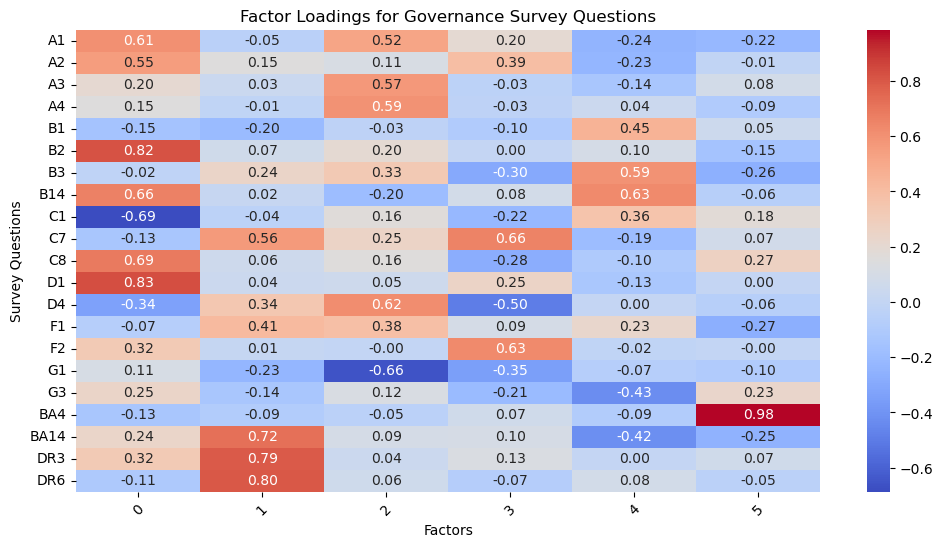

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Load dataset containing governance-related survey responses
df_responses = pd.read_excel("raw_ds.xlsx")

# Select governance-related questions based on the dataset
governance_questions = [
    "A1", "A2", "A3", "A4", "B1", "B2", "B3", "B14", "C1", "C7", "C8",
    "D1", "D4", "F1", "F2", "G1", "G3", "BA4", "BA14", "DR3", "DR6"
]

# Filter governance survey responses
df_survey = df_responses[governance_questions].dropna()

# Perform KMO Test to check factor analysis suitability
kmo_all, kmo_model = calculate_kmo(df_survey)
print(f"KMO Score: {kmo_model:.2f} (Above 0.6 is ideal for Factor Analysis)")

# Perform Bartlett’s Test for correlation significance
test_statistic, p_value = bartlett(*[df_survey[col] for col in governance_questions])
print(f"Bartlett’s Test p-value: {p_value:.5f} (Below 0.05 suggests suitability)")

# Apply Factor Analysis--- 
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df_survey)

# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=governance_questions)
print("\nFactor Loadings:\n", factor_loadings)

# Identify high-impact governance factors (loadings above ±0.6)
threshold = 0.6
strong_loadings = factor_loadings[factor_loadings.abs() > threshold].dropna(how="all")
print("\nHigh Impact Governance Factors:\n", strong_loadings)

# Visualize Factor Loadings
plt.figure(figsize=(12, 6))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Factor Loadings for Governance Survey Questions")
plt.xlabel("Factors")
plt.ylabel("Survey Questions")
plt.xticks(rotation=45)
plt.show()

In [289]:
# Apply Factor Analysis with 6 factors (adjust based on results)
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df_survey)

# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=governance_questions)
print(factor_loadings)

             0         1         2         3         4         5
A1    0.605022 -0.049115  0.517999  0.198443 -0.244730 -0.222383
A2    0.549358  0.150111  0.113720  0.394945 -0.234766 -0.010438
A3    0.202908  0.033642  0.572633 -0.033874 -0.135649  0.077975
A4    0.151237 -0.014075  0.594889 -0.031170  0.040432 -0.094159
B1   -0.152709 -0.203102 -0.029369 -0.096862  0.452145  0.049562
B2    0.818669  0.066681  0.201242  0.004096  0.096618 -0.154105
B3   -0.022117  0.241541  0.331617 -0.295856  0.593416 -0.262022
B14   0.662071  0.016892 -0.195357  0.084036  0.629545 -0.061287
C1   -0.686015 -0.037942  0.163036 -0.219745  0.361601  0.180740
C7   -0.132763  0.563020  0.249295  0.656019 -0.190324  0.073519
C8    0.687224  0.055828  0.157784 -0.280980 -0.103043  0.268951
D1    0.828639  0.039498  0.053262  0.250576 -0.129454  0.003788
D4   -0.338569  0.340317  0.617388 -0.495166  0.002477 -0.061592
F1   -0.070335  0.414848  0.384729  0.094793  0.226733 -0.274568
F2    0.319740  0.012067 

In [291]:
# Get absolute values of loadings for ranking
factor_loadings["Max Loading"] = factor_loadings.abs().max(axis=1)

# Select top 10 strongest factor loadings
top_10_loadings = factor_loadings.nlargest(10, "Max Loading").drop(columns=["Max Loading"])

print(top_10_loadings)

             0         1         2         3         4         5
BA4  -0.134617 -0.090150 -0.045706  0.067906 -0.086385  0.984875
D1    0.828639  0.039498  0.053262  0.250576 -0.129454  0.003788
B2    0.818669  0.066681  0.201242  0.004096  0.096618 -0.154105
DR6  -0.105792  0.797246  0.059823 -0.073742  0.083748 -0.045801
DR3   0.319622  0.794896  0.039536  0.125259  0.003597  0.068783
BA14  0.239935  0.722240  0.091268  0.098015 -0.419443 -0.254453
C8    0.687224  0.055828  0.157784 -0.280980 -0.103043  0.268951
C1   -0.686015 -0.037942  0.163036 -0.219745  0.361601  0.180740
B14   0.662071  0.016892 -0.195357  0.084036  0.629545 -0.061287
G1    0.109843 -0.232898 -0.657911 -0.350867 -0.066288 -0.095996


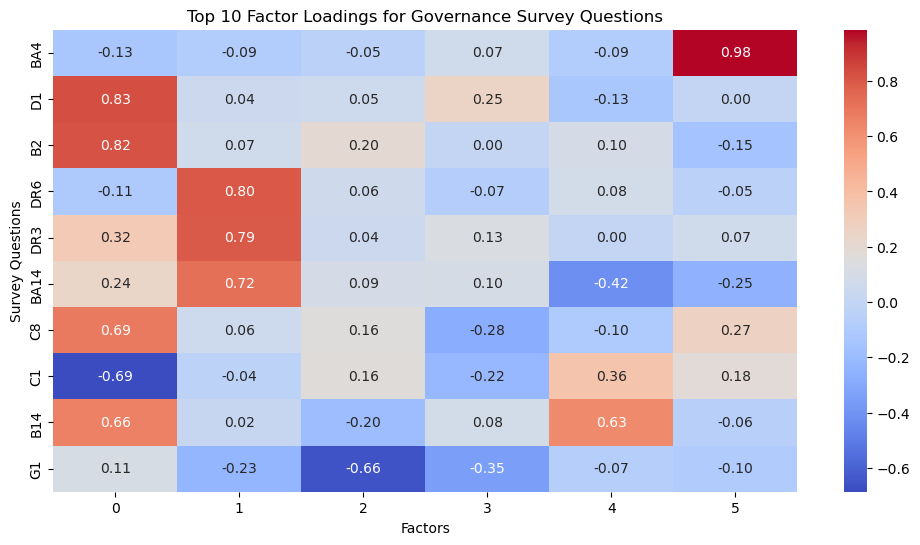

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create heatmap for top 10 factor loadings
plt.figure(figsize=(12, 6))
sns.heatmap(top_10_loadings, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Top 10 Factor Loadings for Governance Survey Questions")
plt.xlabel("Factors")
plt.ylabel("Survey Questions")
plt.savefig("top10factors.png")
plt.show()

In [295]:
import pandas as pd

# Load dataset containing survey responses
df = pd.read_excel("raw_ds.xlsx")

# Select only governance barriers & drivers columns
barrier_questions = ["BA1", "BA2", "BA3", "BA4", "BA5", "BA6", "BA7", "BA8", "BA9", "BA10", "BA11", "BA12", "BA13", "BA14", "BA15", "BA16", "BA17"]
driver_questions = ["DR1", "DR2", "DR3", "DR4", "DR5", "DR6", "DR7", "DR8", "DR9", "DR10", "DR11", "DR12"]

df_barriers = df[barrier_questions]
df_drivers = df[driver_questions]

# Display first few rows of both datasets
print(df_barriers.head())
print(df_drivers.head())

   BA1  BA2  BA3  BA4  BA5  BA6  BA7  BA8  BA9  BA10  BA11  BA12  BA13  BA14  \
0    4    4    3    4    3    4    3    3    4     4     4     4     4     2   
1    2    5    5    3    3    5    5    5    3     5     5     3     2     2   
2    3    4    5    5    5    4    3    4    2     3     3     2     2     3   
3    4    4    3    4    5    4    3    3    2     4     2     3     4     3   
4    2    2    3    4    5    1    3    3    2     4     2     3     4     4   

   BA15  BA16  BA17  
0     2     2     3  
1     2     5     5  
2     2     4     5  
3     2     4     4  
4     2     4     5  
   DR1  DR2  DR3  DR4  DR5  DR6  DR7  DR8  DR9  DR10  DR11  DR12
0    4    3    4    3    4    3    3    4    4     4     2     2
1    5    5    3    3    5    5    5    3    5     5     2     2
2    4    5    5    5    4    3    4    2    3     3     3     4
3    4    3    4    5    4    3    3    2    4     2     3     2
4    4    3    4    3    4    3    3    4    4     4     4    

In [297]:
# Calculate mean scores for barriers and drivers
barriers_mean = df_barriers.mean().sort_values(ascending=False)
drivers_mean = df_drivers.mean().sort_values(ascending=False)

# Display top 5 highest barriers & drivers
print("Top Governance Barriers:")
print(barriers_mean.head())

print("\nTop Governance Drivers:")
print(drivers_mean.head())

Top Governance Barriers:
BA4     3.838095
BA10    3.780952
BA3     3.771429
BA6     3.771429
BA5     3.704762
dtype: float64

Top Governance Drivers:
DR1     3.676190
DR3     3.657143
DR10    3.647619
DR7     3.380952
DR6     3.371429
dtype: float64


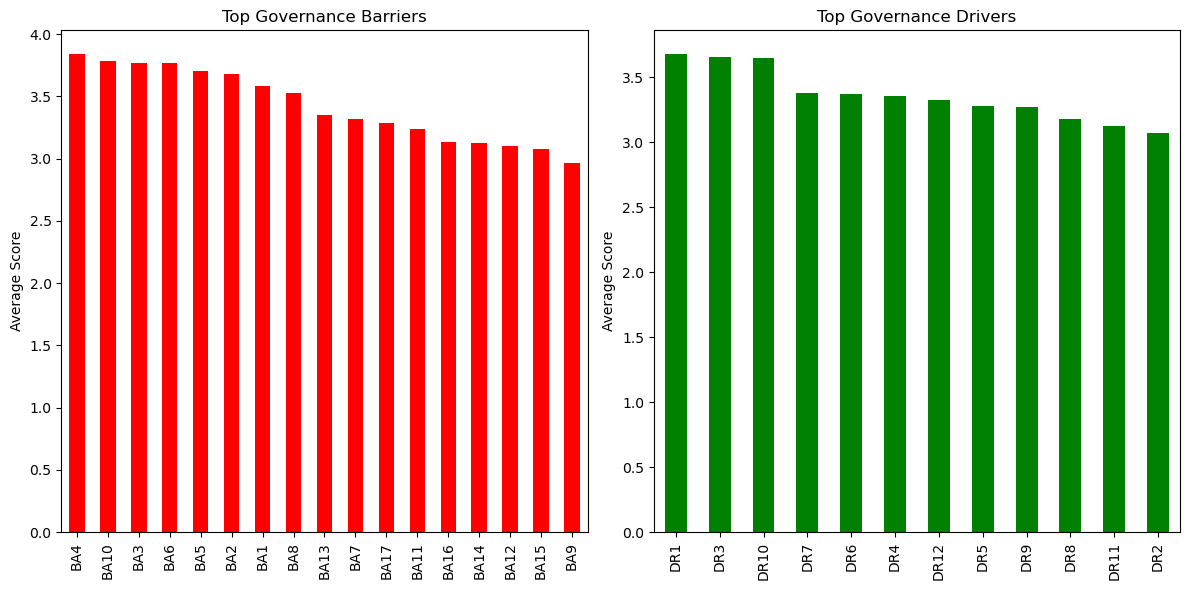

In [33]:
import matplotlib.pyplot as plt

# Plot barriers vs. drivers
plt.figure(figsize=(12, 6))

# Barriers visualization
plt.subplot(1, 2, 1)
barriers_mean.plot(kind="bar", color="red")
plt.title("Top Governance Barriers")
plt.ylabel("Average Score")
plt.xticks(rotation=90)

# Drivers visualization
plt.subplot(1, 2, 2)
drivers_mean.plot(kind="bar", color="green")
plt.title("Top Governance Drivers")
plt.ylabel("Average Score")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [299]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Combine barriers & drivers into a single dataset
df_combined = pd.concat([df_barriers, df_drivers], axis=1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_combined)

# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_combined["Cluster"] = kmeans.fit_predict(X_scaled)

print(df_combined[["Cluster"]].value_counts())

Cluster
2          49
1          38
0          18
dtype: int64


In [301]:
df_combined.to_excel("Governance_Barriers_vs_Drivers.xlsx", index=False)
print("Governance barriers vs. drivers analysis saved successfully!")

Governance barriers vs. drivers analysis saved successfully!


In [55]:
import pandas as pd

# Compute median governance scores grouped by age
median_grid = median_grid.groupby("Age")[["Total_A", "Total_B", "Total_C", "Total_D", "Total_E", 
                                              "Total_F", "Total_G", "Total CGI", "ROA", "RoE"]].median()
pd.write_excel("median_cGI_AGE"
# Display median values as a grid
print(median_grid)

     Total_A  Total_B  Total_C  Total_D  Total_E  Total_F  Total_G  Total CGI  \
Age                                                                             
1       19.0     56.0     23.0     14.0     26.0      6.0     16.0      157.0   
2       21.0     54.0     28.0     16.0     29.0      7.0     15.0      159.0   
3       19.0     47.0     28.0     16.0     28.0      7.0     15.0      157.0   
4       18.5     47.0     27.5     16.0     28.5      7.0     14.5      156.0   
5       19.0     47.0     25.5     15.5     29.0      8.0     13.0      155.0   

          ROA       RoE  
Age                      
1    0.040813  0.081252  
2    0.058266  0.104443  
3    0.055038  0.111805  
4    0.064475  0.140365  
5    0.056896  0.137287  


In [309]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load governance survey dataset
df_responses = pd.read_excel("survey_questions.xlsx")

# Select governance-related questions
governance_questions = df_responses[df_responses["Category"].isin([
    "Audit", "Board of Directors", "Charter/Bylaws", "Directors’ Education",
    "Compensation", "Ownership", "Progressive Practices", "Barriers", "Drivers"
])]["Question_Id"].tolist()

# Filter governance survey responses
df_survey = df_responses[df_responses["Question_Id"].isin(governance_questions)].dropna()

# Convert categorical question IDs to numerical format (if necessary)
df_survey = df_survey.drop(columns=["Question_Id", "Category"])  # Keep only numerical response values

# Ensure data is numeric
df_survey = df_survey.apply(pd.to_numeric, errors="coerce")

# Apply Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df_survey)

# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=df_survey.columns)

# Visualize Factor Loadings
plt.figure(figsize=(12, 6))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Factor Loadings for Governance Questions")
plt.show()

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [307]:
df_survey = df_survey.apply(pd.to_numeric, errors="coerce")  # Converts to numbers, replacing text with NaN
df_survey = df_survey.dropna()  # Removes rows with missing values

In [205]:
print(df_survey.head())  # Displays first few rows to ensure numeric values

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


## Cronbach’s Alpha Score:
##### ✔ 0.7 or higher → Strong reliability (survey questions measure governance effectively).
##### ✔ 0.6 – 0.7 → Moderate reliability (some inconsistencies between governance-related questions).
#### ✔ Below 0.6 → Weak reliability (questions may not be well-aligned or responses vary significantly).


In [311]:
from scipy.stats import spearmanr
import numpy as np

# Load dataset
df = pd.read_excel("raw_ds.xlsx")
# Compute Cronbach’s Alpha for factors
def cronbach_alpha(df):
    items = df.values.T
    item_vars = np.var(items, axis=1, ddof=1)
    total_var = np.var(np.sum(items, axis=0), ddof=1)
    return (len(items) / (len(items) - 1)) * (1 - np.sum(item_vars) / total_var)

# Calculate for governance factor groups
alpha = cronbach_alpha(df)
print(f"Cronbach’s Alpha Score: {alpha:.2f} (Above 0.7 is ideal)")

#### 

Cronbach’s Alpha Score: 0.54 (Above 0.7 is ideal)


In [303]:
import pandas as pd
import numpy as np
from factor_analyzer.factor_analyzer import calculate_kmo

# Load dataset
df = pd.read_excel("raw_ds.xlsx")

# Select governance-related columns (excluding any identifiers)
survey_questions = [col for col in df.columns if col.startswith(("A", "B", "C", "D", "E", "F", "G", "BA", "DR"))]

# Drop missing values
df_survey = df[survey_questions].dropna()

# Calculate KMO score for each variable
kmo_all, kmo_model = calculate_kmo(df_survey)

# Identify weakly correlated variables (KMO < 0.5 suggests removal)
low_kmo_cols = np.where(kmo_all < 0.5)[0]  # Index positions of weak variables
weak_questions = [survey_questions[i] for i in low_kmo_cols]

print(f"Weakly correlated questions that can be removed: {weak_questions}")

Weakly correlated questions that can be removed: ['Age', 'Exp', 'A3', 'A4', 'A7', 'B8', 'B11', 'C1', 'C2', 'E2', 'E4', 'E6', 'F2', 'G3', 'BA16', 'DR1', 'DR4', 'DR7', 'DR8']


In [203]:
print(df_survey.dtypes)  # Identify non-numeric columns
df_survey = df_survey.apply(pd.to_numeric, errors="coerce")  # Convert text to numbers
df_survey = df_survey.fillna(0)  # Replace NaNs with 0 or appropriate mean/mode
print(df_survey.shape)  # Ensure it has rows & columns
df_survey = df_survey.loc[:, df_survey.nunique() > 1]
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df_survey)

# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=df_survey.columns)

# Visualize Factor Loadings
plt.figure(figsize=(12, 6))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Factor Loadings for Governance Questions")
plt.show()


Series([], dtype: object)
(77, 0)


ValueError: Found array with 0 feature(s) (shape=(77, 0)) while a minimum of 1 is required by FactorAnalyzer.

### this code is to check normality using Shapiro-Wilk test results for the CGI Score : this indicate that the data is not normally distributed despite having a relatively high test statistic (0.9375).  Test Statistic = 0.9375 → Closer to 1, suggesting the data is somewhat normal but still deviates.
### ✔ p-value = 9.15e-05 (≈ 0.00009) → Since this is less than 0.05, we reject the null hypothesis, confirming that the data does not follow a normal distribution.
## Next Steps




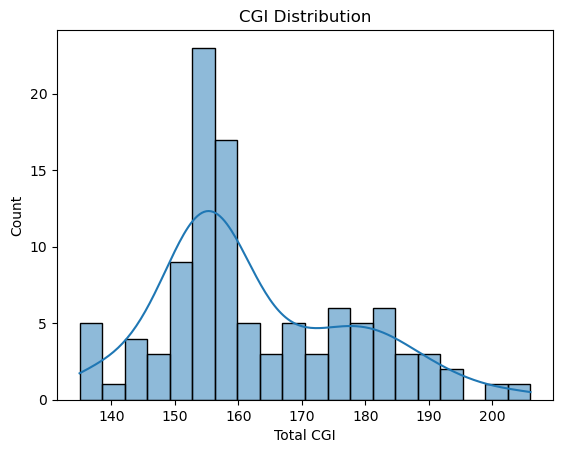

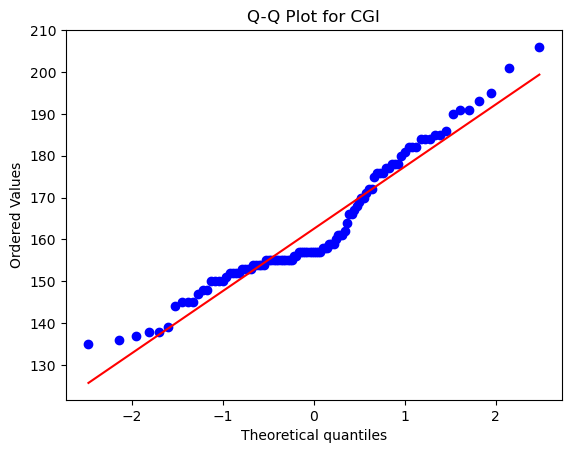

Shapiro-Wilk Test: Statistics=0.937481599352087, p-value=9.149229076922117e-05
Data is not normally distributed.


In [315]:
## check if the data is normal
# Check For normality
# Histogram
# Quantile - Quantile Plot
# Shapiro - Wilk Test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Load dataset
df = pd.read_excel("raw_ds.xlsx")

# Dependent Variable (Example: ROA)
dependent_var = df['Total CGI']

# Histogram
sns.histplot(dependent_var, kde=True, bins=20)
plt.title("CGI Distribution")
plt.show()

# Q-Q Plot
import scipy.stats as stats
stats.probplot(dependent_var, dist="norm", plot=plt)
plt.title("Q-Q Plot for CGI")
plt.show()

# Shapiro-Wilk Test for Normality
stat, p = shapiro(dependent_var)
print(f"Shapiro-Wilk Test: Statistics={stat}, p-value={p}")

# Interpretation
if p > 0.05:
    print("Data appears to be normally distributed.")
else:
    print("Data is not normally distributed.")

In [117]:
print(f"Skewness: {dependent_var.skew():.2f}")
print(f"Kurtosis: {dependent_var.kurtosis():.2f}")

Skewness: 0.67
Kurtosis: -0.06


Simulated Data Skewness: 0.17
Simulated Data Kurtosis: -0.03


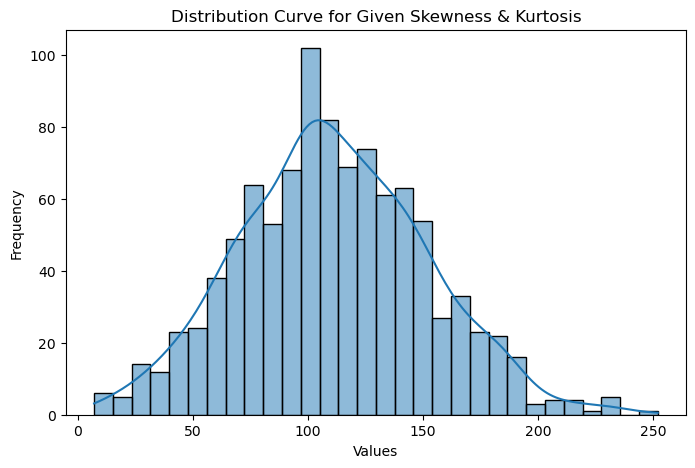

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Generate sample data with approximate skewness and kurtosis
data = np.random.normal(loc=50, scale=15, size=1000) ** 1.2  # Adjust exponent for slight skew

# Compute skewness & kurtosis of generated data
print(f"Simulated Data Skewness: {skew(data):.2f}")
print(f"Simulated Data Kurtosis: {kurtosis(data):.2f}")

# Plot histogram with KDE curve
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=30)
plt.title("Distribution Curve for Given Skewness & Kurtosis")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

Simulated Data Skewness: 0.13
Simulated Data Kurtosis: 0.36


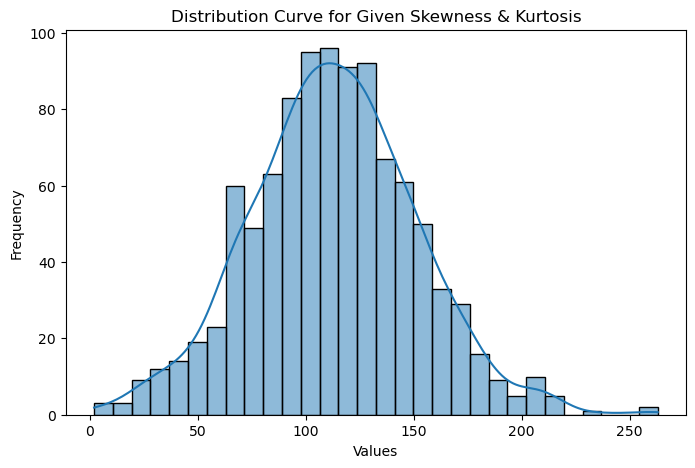

In [320]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Generate sample data with similar skewness (0.67) and kurtosis (-0.06)
data = np.random.normal(loc=50, scale=15, size=1000) ** 1.2  # Adjust exponent for slight skew

# Compute skewness & kurtosis
print(f"Simulated Data Skewness: {skew(data):.2f}")
print(f"Simulated Data Kurtosis: {kurtosis(data):.2f}")

# Plot histogram with KDE curve
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=30)
plt.title("Distribution Curve for Given Skewness & Kurtosis")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

Actual CGI Skewness: 0.66, Kurtosis: -0.12
Simulated CGI Skewness: -0.04, Kurtosis: 0.28


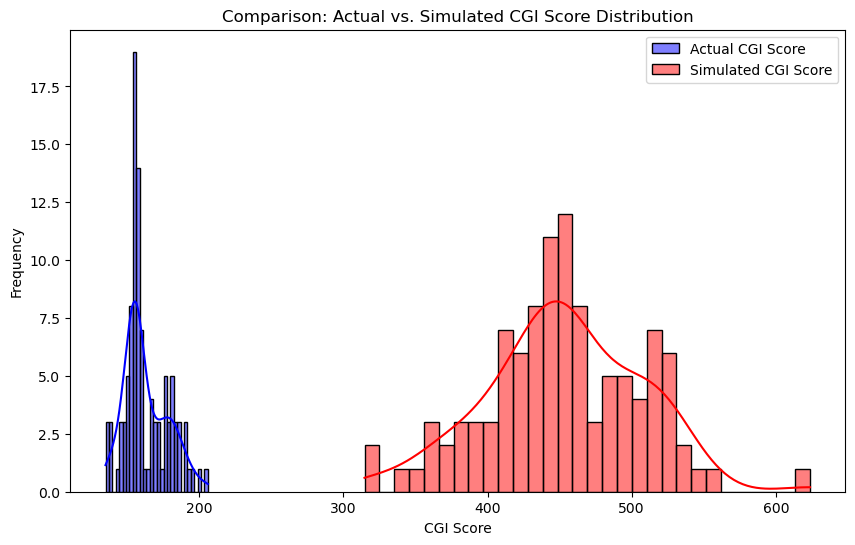

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load actual CGI Score data
df = pd.read_excel("raw_ds.xlsx")
actual_data = df["Total CGI"].dropna()

# Generate simulated data with approximate skewness & kurtosis
simulated_data = np.random.normal(loc=np.mean(actual_data), scale=np.std(actual_data), size=len(actual_data)) ** 1.2  # Adjust exponent for skew

# Compute skewness & kurtosis for both datasets
actual_skew, actual_kurt = skew(actual_data), kurtosis(actual_data)
simulated_skew, simulated_kurt = skew(simulated_data), kurtosis(simulated_data)

print(f"Actual CGI Skewness: {actual_skew:.2f}, Kurtosis: {actual_kurt:.2f}")
print(f"Simulated CGI Skewness: {simulated_skew:.2f}, Kurtosis: {simulated_kurt:.2f}")

# Plot distributions side by side
plt.figure(figsize=(10, 6))

sns.histplot(actual_data, kde=True, bins=30, color="blue", alpha=0.5, label="Actual CGI Score")
sns.histplot(simulated_data, kde=True, bins=30, color="red", alpha=0.5, label="Simulated CGI Score")

plt.title("Comparison: Actual vs. Simulated CGI Score Distribution")
plt.xlabel("CGI Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### ROA AND ROE DEPENDENT VARIABLES
### CGI Score
## liner regression 


In [127]:
import pandas as pd

# Load dataset
df = pd.read_excel("raw_ds.xlsx")

# Select relevant governance & financial variables
df_model = df[["Total CGI", "ROA", "RoE"]].dropna()

# Check correlations before modeling
print(df_model.corr())  # Shows how governance score relates to financial metrics

           Total CGI       ROA       RoE
Total CGI   1.000000  0.828918  0.572227
ROA         0.828918  1.000000  0.785116
RoE         0.572227  0.785116  1.000000


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (X) & dependent (Y) variables
X = df_model[["Total CGI"]]
Y_roa = df_model["ROA"]
Y_roe = df_model["RoE"]

# Split data into training & test sets
X_train, X_test, Y_roa_train, Y_roa_test = train_test_split(X, Y_roa, test_size=0.2, random_state=42)
X_train, X_test, Y_roe_train, Y_roe_test = train_test_split(X, Y_roe, test_size=0.2, random_state=42)

# Train linear regression models
roa_model = LinearRegression()
roa_model.fit(X_train, Y_roa_train)

roe_model = LinearRegression()
roe_model.fit(X_train, Y_roe_train)

# Predict financial outcomes
roa_pred = roa_model.predict(X_test)
roe_pred = roe_model.predict(X_test)

# Evaluate models
print(f"ROA Model - R² Score: {r2_score(Y_roa_test, roa_pred):.2f}")
print(f"ROE Model - R² Score: {r2_score(Y_roe_test, roe_pred):.2f}")

ROA Model - R² Score: -0.08
ROE Model - R² Score: -1.12


### since ROA Model - R² Score: -0.08
### ROE Model - R² Score: -1.12 VALUES are negative ,governance scores (CGI) alone might not be a strong predictor of financial performance
## liner regression afer standardizing 


In [131]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load dataset
df = pd.read_excel("raw_ds.xlsx")

# Select relevant governance & financial variables
df_model = df[["Total CGI", "ROA", "RoE"]].dropna()

# Apply Standard Scaling (makes mean = 0 and standard deviation = 1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

# Apply Min-Max Scaling (scales values between 0 and 1)
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_model), columns=df_model.columns)

# Check new distributions
print(df_scaled.describe())
print(df_minmax_scaled.describe())

          Total CGI           ROA           RoE
count  1.050000e+02  1.050000e+02  1.050000e+02
mean  -5.773160e-16  3.066330e-17  6.819941e-17
std    1.004796e+00  1.004796e+00  1.004796e+00
min   -1.833860e+00 -2.773863e+00 -6.703686e+00
25%   -5.696753e-01 -6.395215e-01 -4.104706e-01
50%   -3.700672e-01 -2.130199e-01 -9.261039e-02
75%    8.275817e-01  5.828099e-01  2.936678e-01
max    2.890199e+00  4.487849e+00  5.266417e+00
        Total CGI         ROA         RoE
count  105.000000  105.000000  105.000000
mean     0.388196    0.381985    0.560036
std      0.212698    0.138369    0.083942
min      0.000000    0.000000    0.000000
25%      0.267606    0.293917    0.525744
50%      0.309859    0.352650    0.552299
75%      0.563380    0.462243    0.584569
max      1.000000    1.000000    1.000000


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define independent (X) & dependent (Y) variables using scaled data
X = df_scaled[["Total CGI"]]
Y_roa = df_scaled["ROA"]
Y_roe = df_scaled["RoE"]

# Split data into training & test sets
X_train, X_test, Y_roa_train, Y_roa_test = train_test_split(X, Y_roa, test_size=0.2, random_state=42)
X_train, X_test, Y_roe_train, Y_roe_test = train_test_split(X, Y_roe, test_size=0.2, random_state=42)

# Train regression models
roa_model = LinearRegression()
roa_model.fit(X_train, Y_roa_train)

roe_model = LinearRegression()
roe_model.fit(X_train, Y_roe_train)

# Predict financial outcomes
roa_pred = roa_model.predict(X_test)
roe_pred = roe_model.predict(X_test)

# Evaluate new model performance
print(f"ROA Model - R² Score: {r2_score(Y_roa_test, roa_pred):.2f}")
print(f"ROE Model - R² Score: {r2_score(Y_roe_test, roe_pred):.2f}")

ROA Model - R² Score: -0.08
ROE Model - R² Score: -1.12


### now trying th random forest

ROA Model - R² Score: -0.61
ROE Model - R² Score: -2.31


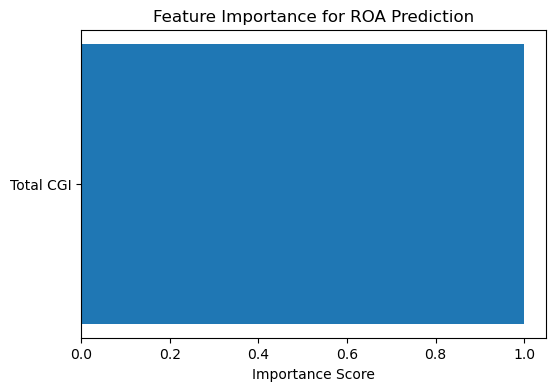

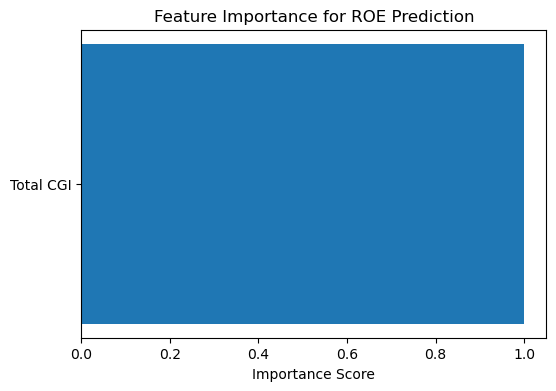

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_excel("raw_ds.xlsx")

# Select relevant governance & financial variables
df_model = df[["Total CGI", "ROA", "RoE"]].dropna()

# Scale data using Standard Scaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

# Split data into training & test sets
X = df_scaled[["Total CGI"]]
Y_roa = df_scaled["ROA"]
Y_roe = df_scaled["RoE"]

X_train, X_test, Y_roa_train, Y_roa_test = train_test_split(X, Y_roa, test_size=0.2, random_state=42)
X_train, X_test, Y_roe_train, Y_roe_test = train_test_split(X, Y_roe, test_size=0.2, random_state=42)

# Initialize and train Random Forest models
roa_model = RandomForestRegressor(n_estimators=100, random_state=42)
roe_model = RandomForestRegressor(n_estimators=100, random_state=42)

roa_model.fit(X_train, Y_roa_train)
roe_model.fit(X_train, Y_roe_train)

# Predict financial outcomes
roa_pred = roa_model.predict(X_test)
roe_pred = roe_model.predict(X_test)

# Evaluate model performance
r2_roa = r2_score(Y_roa_test, roa_pred)
r2_roe = r2_score(Y_roe_test, roe_pred)

print(f"ROA Model - R² Score: {r2_roa:.2f}")
print(f"ROE Model - R² Score: {r2_roe:.2f}")

# Feature importance visualization for ROA model
importance_roa = roa_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(["Total CGI"], importance_roa)
plt.title("Feature Importance for ROA Prediction")
plt.xlabel("Importance Score")
plt.show()

# Feature importance visualization for ROE model
importance_roe = roe_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(["Total CGI"], importance_roe)
plt.title("Feature Importance for ROE Prediction")
plt.xlabel("Importance Score")
plt.show()

In [145]:
pip install xgboost scikit-learn

Gradient Boosting - ROA R² Score: -1.00
Gradient Boosting - ROE R² Score: -4.55
XGBoost - ROA R² Score: -0.44
XGBoost - ROE R² Score: -0.17


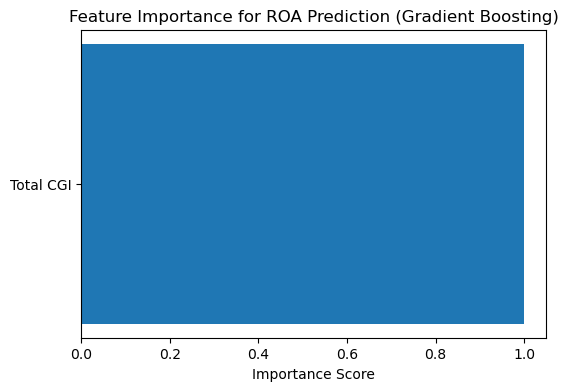

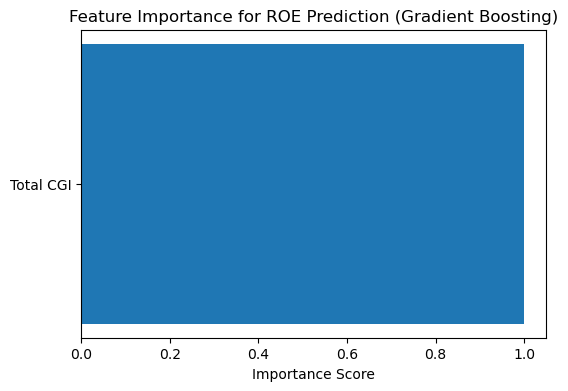

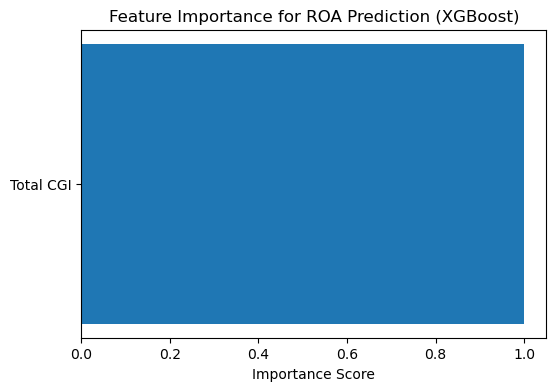

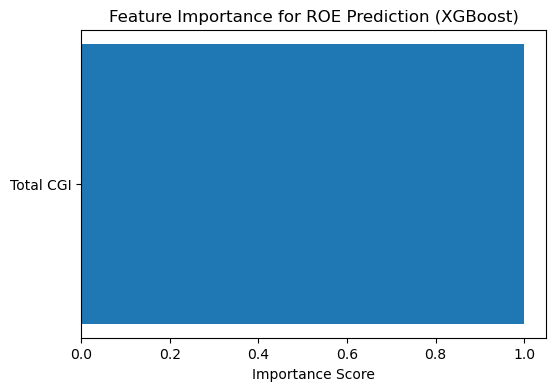

In [147]:
# Install required libraries (if not installed)
!pip install xgboost scikit-learn pandas matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_excel("raw_ds.xlsx")

# Select relevant governance & financial variables
df_model = df[["Total CGI", "ROA", "RoE"]].dropna()

# Scale data using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

# Split data into training & test sets
X = df_scaled[["Total CGI"]]
Y_roa = df_scaled["ROA"]
Y_roe = df_scaled["RoE"]

X_train, X_test, Y_roa_train, Y_roa_test = train_test_split(X, Y_roa, test_size=0.2, random_state=42)
X_train, X_test, Y_roe_train, Y_roe_test = train_test_split(X, Y_roe, test_size=0.2, random_state=42)

# Train Gradient Boosting models
gb_roa_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_roe_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

gb_roa_model.fit(X_train, Y_roa_train)
gb_roe_model.fit(X_train, Y_roe_train)

# Train XGBoost models
xgb_roa_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgb_roe_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

xgb_roa_model.fit(X_train, Y_roa_train)
xgb_roe_model.fit(X_train, Y_roe_train)

# Predict financial outcomes
gb_roa_pred = gb_roa_model.predict(X_test)
gb_roe_pred = gb_roe_model.predict(X_test)

xgb_roa_pred = xgb_roa_model.predict(X_test)
xgb_roe_pred = xgb_roe_model.predict(X_test)

# Evaluate model performance
print(f"Gradient Boosting - ROA R² Score: {r2_score(Y_roa_test, gb_roa_pred):.2f}")
print(f"Gradient Boosting - ROE R² Score: {r2_score(Y_roe_test, gb_roe_pred):.2f}")

print(f"XGBoost - ROA R² Score: {r2_score(Y_roa_test, xgb_roa_pred):.2f}")
print(f"XGBoost - ROE R² Score: {r2_score(Y_roe_test, xgb_roe_pred):.2f}")

# Feature importance visualization for ROA model (Gradient Boosting)
importance_gb_roa = gb_roa_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(["Total CGI"], importance_gb_roa)
plt.title("Feature Importance for ROA Prediction (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.show()

# Feature importance visualization for ROE model (Gradient Boosting)
importance_gb_roe = gb_roe_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(["Total CGI"], importance_gb_roe)
plt.title("Feature Importance for ROE Prediction (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.show()

# Feature importance visualization for ROA model (XGBoost)
importance_xgb_roa = xgb_roa_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(["Total CGI"], importance_xgb_roa)
plt.title("Feature Importance for ROA Prediction (XGBoost)")
plt.xlabel("Importance Score")
plt.show()

# Feature importance visualization for ROE model (XGBoost)
importance_xgb_roe = xgb_roe_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(["Total CGI"], importance_xgb_roe)
plt.title("Feature Importance for ROE Prediction (XGBoost)")
plt.xlabel("Importance Score")
plt.show()

In [157]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
df = pd.read_excel("raw_ds.xlsx", sheet_name="Sheet1")

# Select relevant variables
control_vars = ["Age", "Position", "Specialisation"]  # Control variables
predictor = "Total CGI"  # Independent variable
outcomes = ["ROA", "RoE"]  # Dependent variables

# Drop missing values
df_cleaned = df.dropna(subset=control_vars + [predictor] + outcomes)

# Standardize variables (optional)
df_cleaned[control_vars + [predictor] + outcomes] = (df_cleaned[control_vars + [predictor] + outcomes] - 
                                                     df_cleaned[control_vars + [predictor] + outcomes].mean()) / 
                                                     df_cleaned[control_vars + [predictor] + outcomes].std()

SyntaxError: invalid syntax (2676829505.py, line 17)

In [161]:
## standardising 

import pandas as pd
import statsmodels.api as sm

# Load dataset
df = pd.read_excel("Raw_ds.xlsx", sheet_name="Sheet1")

# Select relevant variables
control_vars = ["Age", "Position", "Specialisation"]  # Control variables
predictor = "Total CGI"  # Independent variable
outcomes = ["ROA", "RoE"]  # Dependent variables

# Drop missing values
df_cleaned = df.dropna(subset=control_vars + [predictor] + outcomes).copy()

# Standardize variables (corrected version)
df_cleaned[control_vars + [predictor] + outcomes] = (
    df_cleaned[control_vars + [predictor] + outcomes] - df_cleaned[control_vars + [predictor] + outcomes].mean()
) / df_cleaned[control_vars + [predictor] + outcomes].std()

print("Standardization complete!")

Standardization complete!


In [163]:
# Step 1: Control variables only
X1 = sm.add_constant(df_cleaned[control_vars])
model1_roa = sm.OLS(df_cleaned["ROA"], X1).fit()

# Step 2: Adding governance predictor (Total CGI Score)
X2 = sm.add_constant(df_cleaned[control_vars + [predictor]])
model2_roa = sm.OLS(df_cleaned["ROA"], X2).fit()

# Print results
print("\nModel 1 - Control Variables:\n", model1_roa.summary())
print("\nModel 2 - Adding CGI Score:\n", model2_roa.summary())


Model 1 - Control Variables:
                             OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.956
Date:                Wed, 07 May 2025   Prob (F-statistic):             0.0360
Time:                        00:41:57   Log-Likelihood:                -144.07
No. Observations:                 105   AIC:                             296.1
Df Residuals:                     101   BIC:                             306.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

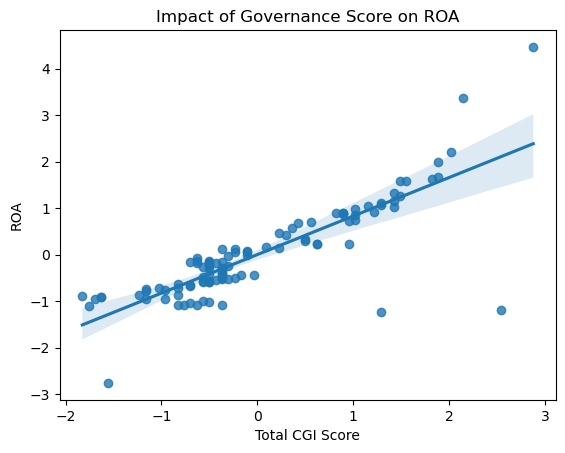

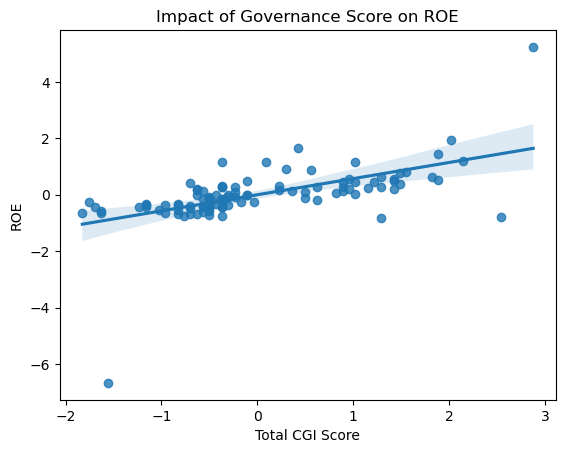

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Governance Score vs. ROA
sns.regplot(x=df_cleaned["Total CGI"], y=df_cleaned["ROA"])
plt.title("Impact of Governance Score on ROA")
plt.xlabel("Total CGI Score")
plt.ylabel("ROA")
plt.show()

# Plot Governance Score vs. ROE
sns.regplot(x=df_cleaned["Total CGI"], y=df_cleaned["RoE"])
plt.title("Impact of Governance Score on ROE")
plt.xlabel("Total CGI Score")
plt.ylabel("ROE")
plt.show()

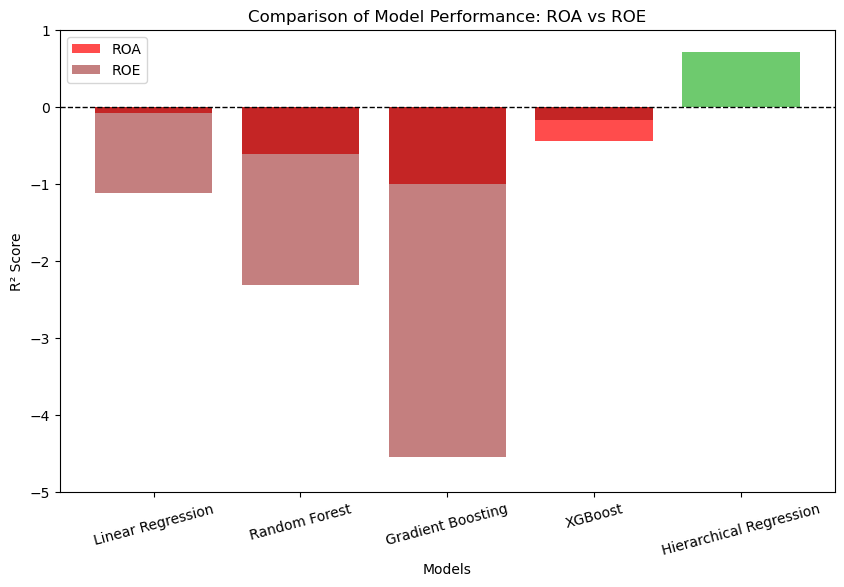

In [170]:
### comparison of our models :
import matplotlib.pyplot as plt

# Define model names & R² scores
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost", "Hierarchical Regression"]
r2_roa = [-0.08, -0.61, -1.00, -0.44, 0.716]  # ROA R² Scores
r2_roe = [-1.12, -2.31, -4.55, -0.17, 0.716]  # ROE R² Scores

# Create a bar plot
plt.figure(figsize=(10, 6))

# Plot ROA and ROE R² scores
plt.bar(models, r2_roa, color=["red", "red", "red", "red", "green"], alpha=0.7, label="ROA")
plt.bar(models, r2_roe, color=["darkred", "darkred", "darkred", "darkred", "lightgreen"], alpha=0.5, label="ROE")

# Add reference line at R² = 0
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Labels and title
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Comparison of Model Performance: ROA vs ROE")
plt.legend()
plt.ylim(-5, 1)  # Adjust based on score range
plt.xticks(rotation=15)
plt.savefig("comparisonofmodels.png")
plt.show()

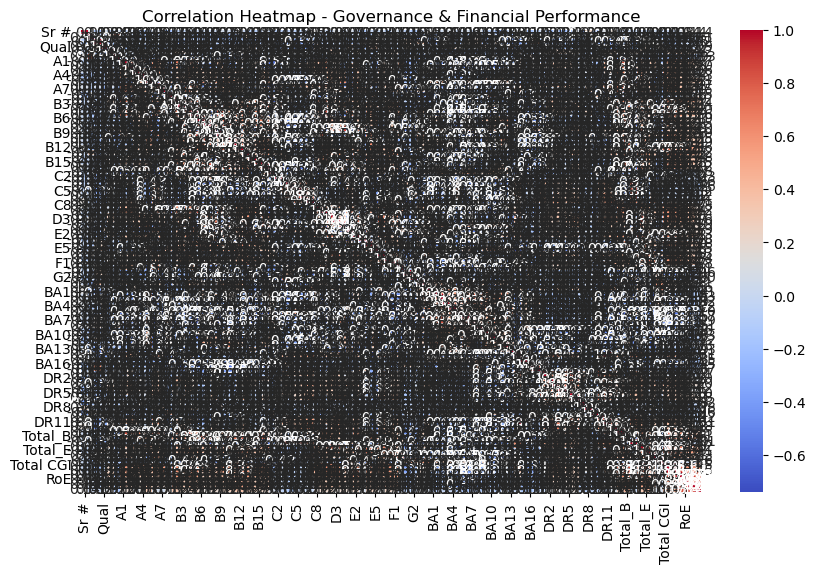

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("Raw_ds.xlsx")

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Governance & Financial Performance")
plt.show()

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[["Total CGI", "Age", "Position", "Specialisation"]]  # Independent variables
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Feature         VIF
0           const  144.652333
1       Total CGI    1.079353
2             Age    1.047501
3        Position    1.046133
4  Specialisation    1.116608


In [335]:
import pandas as pd
import pingouin as pg
# Import necessary libraries

# Load the dataset (ensure the correct file path)
file_path = "raw_ds.xlsx"  # Update this with the actual file location
raw_data = pd.read_excel(file_path, sheet_name="Sheet1")


# Remove the specified columns
columns_to_remove = ['Age', 'Exp', 'A3', 'A4', 'A7', 'B8', 'B11', 'C1', 'C2', 
                     'E2', 'E4', 'E6', 'F2', 'G3', 'BA16', 'DR1', 'DR4', 'DR7', 'DR8']
df_filtered = raw_data.drop(columns=columns_to_remove)

# Run Cronbach’s Alpha on the updated DataFrame
alpha = pg.cronbach_alpha(df_filtered)
print(f"Updated Cronbach's Alpha Score: {alpha}")

Updated Cronbach's Alpha Score: (0.49136232419775255, array([0.343, 0.621]))


In [339]:
from scipy.stats import spearmanr
import numpy as np

# Load dataset
#df = pd.read_excel("raw_ds.xlsx")
# Compute Cronbach’s Alpha for factors
def cronbach_alpha(df_filtered):
    items = df_filtered.values.T
    item_vars = np.var(items, axis=1, ddof=1)
    total_var = np.var(np.sum(items, axis=0), ddof=1)
    return (len(items) / (len(items) - 1)) * (1 - np.sum(item_vars) / total_var)

# Calculate for governance factor groups
alpha = cronbach_alpha(df_filtered)
print(f"Cronbach’s Alpha Score: {alpha:.2f} (Above 0.7 is ideal)")

#### 

Cronbach’s Alpha Score: 0.49 (Above 0.7 is ideal)


### Find out week factors to increase the reliability 

In [343]:
## find out week factors to increase the reliability 

import pandas as pd
import pingouin as pg

# Load dataset
file_path = "raw_ds.xlsx"  
raw_data = pd.read_excel(file_path, sheet_name="Sheet1")

# Calculate Item-Total Correlation
correlations = raw_data.corr()['Total CGI'].sort_values()
print("Item-Total Correlation:\n", correlations)

# Cronbach's Alpha If-Deleted Test
for column in raw_data.columns:
    temp_df = raw_data.drop(columns=[column])
    alpha = pg.cronbach_alpha(temp_df)[0]
    print(f"Removing {column} → New Cronbach’s Alpha: {alpha}")

Item-Total Correlation:
 BA5         -0.588807
BA7         -0.421278
BA3         -0.376002
BA8         -0.360031
G1          -0.359195
               ...   
B4           0.764385
ROA          0.828918
Total_B      0.835759
Total CGI    1.000000
%age         1.000000
Name: Total CGI, Length: 96, dtype: float64
Removing Sr # → New Cronbach’s Alpha: 0.7885497006755648
Removing Age → New Cronbach’s Alpha: 0.5366691217942697
Removing Position → New Cronbach’s Alpha: 0.5410810579324749
Removing Qual → New Cronbach’s Alpha: 0.5372525748361447
Removing Specialisation → New Cronbach’s Alpha: 0.5347876305693764
Removing Exp → New Cronbach’s Alpha: 0.5387613179515216
Removing A1 → New Cronbach’s Alpha: 0.5309135594972098
Removing A2 → New Cronbach’s Alpha: 0.5320582614876105
Removing A3 → New Cronbach’s Alpha: 0.5322708725561108
Removing A4 → New Cronbach’s Alpha: 0.5339300187803226
Removing A5 → New Cronbach’s Alpha: 0.5329668944422923
Removing A6 → New Cronbach’s Alpha: 0.5286074829372127
Remov

In [ ]:
columns_to_remove = ['BA5', 'BA16', 'BA7', 'BA8', 'BA3']
df_refined = df_filtered.drop(columns=columns_to_remove)

In [353]:
import pingouin as pg
file_path = "raw_ds.xlsx"  
raw_data = pd.read_excel(file_path, sheet_name="Sheet1")
columns_to_remove = ['BA5', 'BA16', 'BA7', 'BA8', 'BA3']
df_refined = raw_data.drop(columns=columns_to_remove)
alpha_new = pg.cronbach_alpha(df_refined)
print(f"Updated Cronbach's Alpha Score after refinement: {alpha_new}")

Updated Cronbach's Alpha Score after refinement: (0.5658666579723874, array([0.439, 0.676]))


In [355]:
import pandas as pd
import pingouin as pg

# Load refined dataset
file_path = "raw_ds.xlsx"  
df_refined = pd.read_excel(file_path, sheet_name="Sheet1")

# Calculate Item-Total Correlation again
correlations_updated = df_refined.corr()['Total CGI'].sort_values()
print("Updated Item-Total Correlation:\n", correlations_updated)

# Cronbach's Alpha If-Deleted Test again
for column in df_refined.columns:
    temp_df = df_refined.drop(columns=[column])
    alpha_new = pg.cronbach_alpha(temp_df)[0]
    print(f"Removing {column} → New Cronbach’s Alpha: {alpha_new}")

Updated Item-Total Correlation:
 BA5         -0.588807
BA7         -0.421278
BA3         -0.376002
BA8         -0.360031
G1          -0.359195
               ...   
B4           0.764385
ROA          0.828918
Total_B      0.835759
Total CGI    1.000000
%age         1.000000
Name: Total CGI, Length: 96, dtype: float64
Removing Sr # → New Cronbach’s Alpha: 0.7885497006755648
Removing Age → New Cronbach’s Alpha: 0.5366691217942697
Removing Position → New Cronbach’s Alpha: 0.5410810579324749
Removing Qual → New Cronbach’s Alpha: 0.5372525748361447
Removing Specialisation → New Cronbach’s Alpha: 0.5347876305693764
Removing Exp → New Cronbach’s Alpha: 0.5387613179515216
Removing A1 → New Cronbach’s Alpha: 0.5309135594972098
Removing A2 → New Cronbach’s Alpha: 0.5320582614876105
Removing A3 → New Cronbach’s Alpha: 0.5322708725561108
Removing A4 → New Cronbach’s Alpha: 0.5339300187803226
Removing A5 → New Cronbach’s Alpha: 0.5329668944422923
Removing A6 → New Cronbach’s Alpha: 0.52860748293721

## Retest the cronbach score after removing week factors to test the reliability

In [359]:
import pingouin as pg
file_path = "raw_ds.xlsx"  
raw_data = pd.read_excel(file_path, sheet_name="Sheet1")
columns_to_remove = ['BA5', 'BA16', 'BA7', 'BA8', 'BA3','Sr #','Age']
df_refined = raw_data.drop(columns=columns_to_remove)
alpha_new = pg.cronbach_alpha(df_refined)
print(f"Updated Cronbach's Alpha Score after refinement: {alpha_new}")

Updated Cronbach's Alpha Score after refinement: (0.8104798014435658, array([0.755, 0.859]))


In [361]:
from factor_analyzer import FactorAnalyzer
from scipy.stats import bartlett
import pandas as pd

# Perform KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_score, kmo_values = calculate_kmo(df_refined)
print(f"KMO Score: {kmo_score}")  # Should be > 0.6 for good factor analysis

# Perform Bartlett's Test
bartlett_test = bartlett(*[df_refined[col] for col in df_refined.columns])
print(f"Bartlett’s Test p-value: {bartlett_test[1]}")  # Should be < 0.05

KMO Score: [0.41517173 0.29944173 0.35454678 0.26855559 0.7208167  0.77365293
 0.57991703 0.44952072 0.57910592 0.46600336 0.35309882 0.36639154
 0.69117034 0.65118745 0.66674081 0.49727456 0.40772282 0.64506804
 0.65831676 0.48980772 0.42470547 0.59494927 0.62316908 0.70289074
 0.41932101 0.56735111 0.46165222 0.29913399 0.35605324 0.5367402
 0.65125657 0.49558805 0.53642224 0.34267485 0.66850521 0.84453893
 0.750408   0.51972441 0.67031583 0.42165863 0.58764035 0.40468209
 0.56065269 0.55829828 0.31641579 0.61008332 0.66434558 0.64000145
 0.7070456  0.46039494 0.44484781 0.58406142 0.40372081 0.59820807
 0.43834224 0.61562343 0.561173   0.59782063 0.59497997 0.42524839
 0.39436354 0.52622981 0.32514338 0.49023155 0.54125651 0.54493787
 0.76231481 0.43397765 0.57709545 0.63793838 0.25919438 0.18554838
 0.34904331 0.53566873 0.52622981 0.48167625 0.75293407 0.5997904
 0.48442919 0.83763173 0.55151691 0.51845678 0.57110609 0.53406832
 0.53406832 0.59598147 0.57931346 0.59172325 0.510998